<center>Myranda Swartzwelter<br>
    DSC-630 T301 Data Mining<br>
    Week 4 Assignment: Clustering


In [38]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

Remove any data that is not relevant to the patient’s ALS condition.

In [55]:
#Import the asl data as a data frame and ensure that the data is loaded properly.
#pd.set_option("display.max_columns", None)
df = pd.read_csv('als_data.csv')
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.

In [5]:
#Drop ID columns
df.drop(columns=['SubjectID','ID'], inplace=True)
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,104

In [4]:
#Check for any features that are missing more than 40% of their values.
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing']>40]

,column_name,percent_missing


In [6]:
#Check for na values
na_df = df[df.columns[df.isnull().any()]]
na_df

""
0
1
2
3
4
...
2218
2219
2220
2221


Apply a standard scalar to the data.

In [10]:
#Implement a Standard Scaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

For n_clusters = 2 The average silhouette_score is : 0.07887730960924653
For n_clusters = 3 The average silhouette_score is : 0.0687707291658565
For n_clusters = 4 The average silhouette_score is : 0.07083050416977761
For n_clusters = 5 The average silhouette_score is : 0.07563157883964931
For n_clusters = 6 The average silhouette_score is : 0.06151137092769171


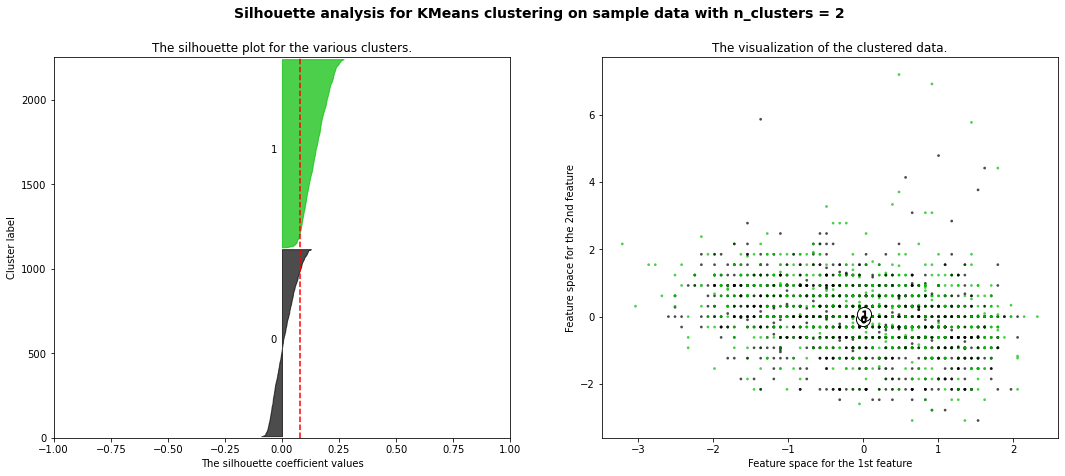

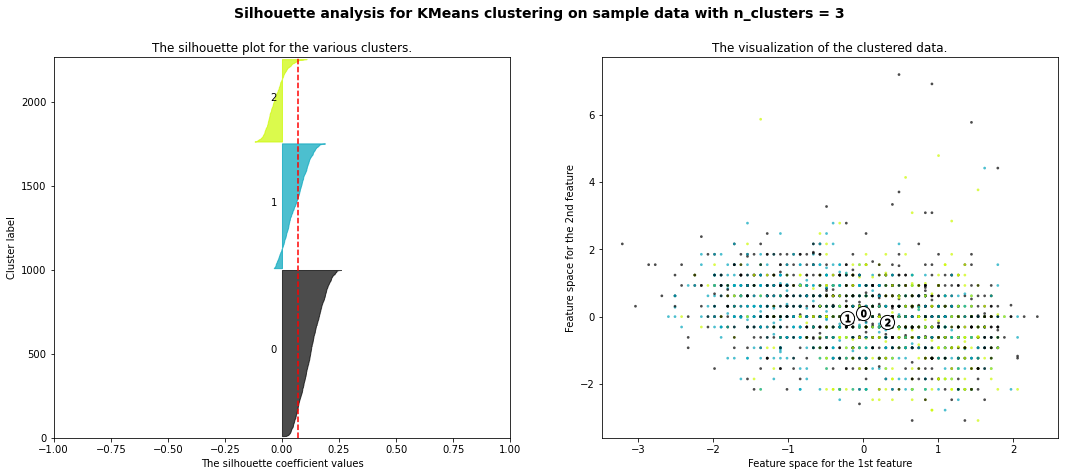

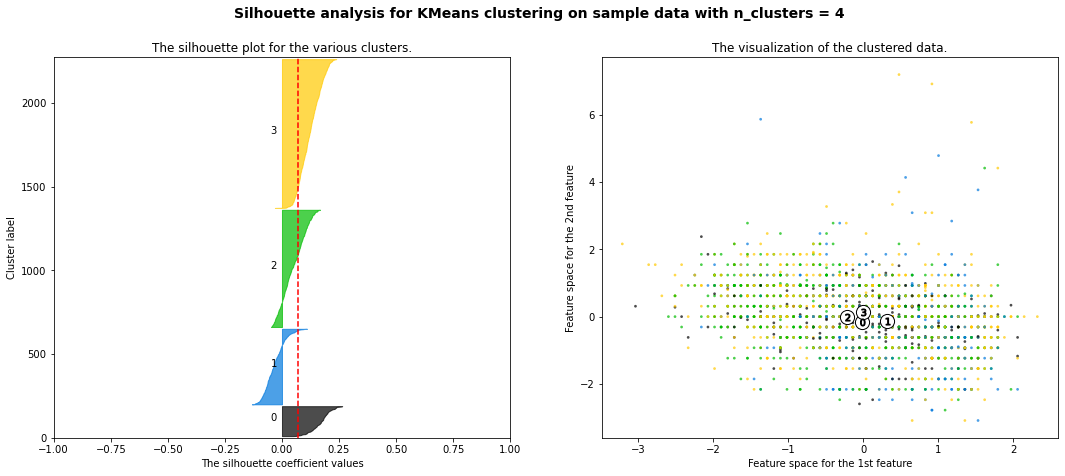

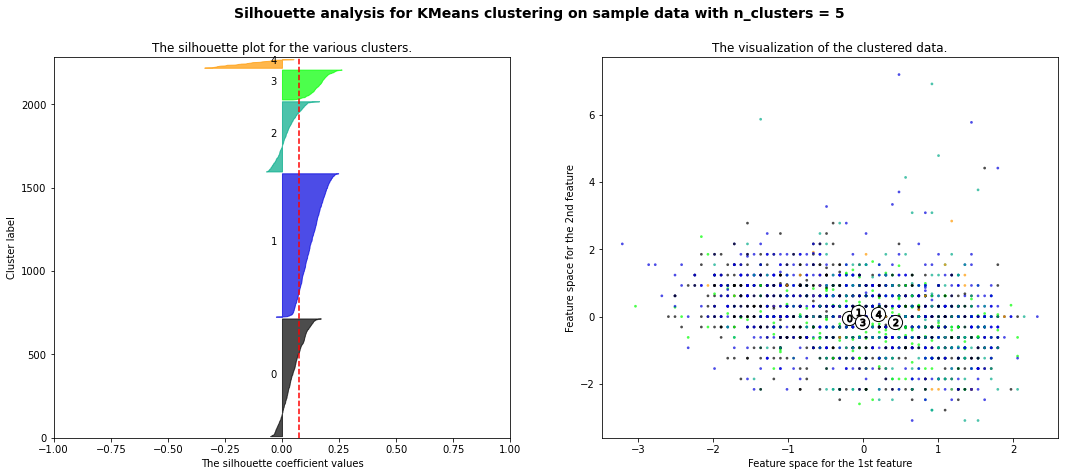

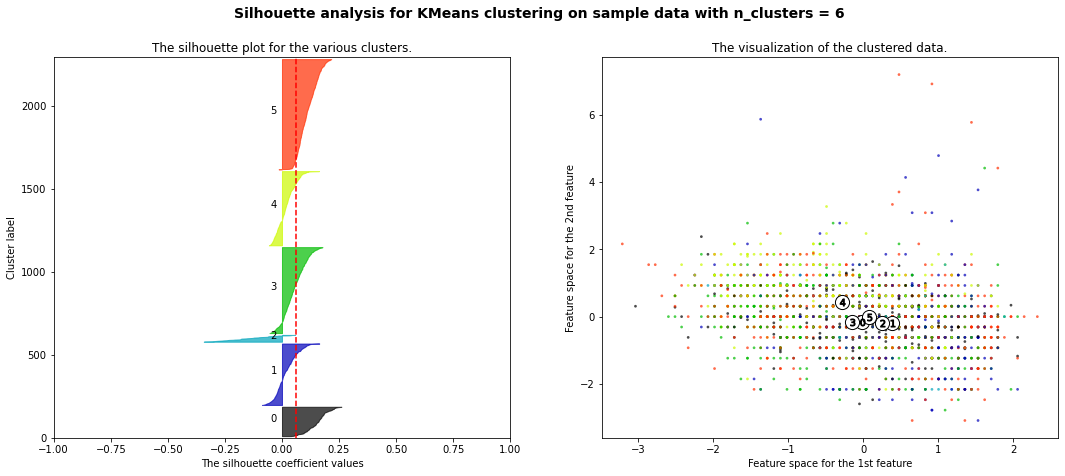

In [41]:
#Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
range_n_clusters = [2, 3, 4, 5, 6]

X = scaled_df

for n_clusters in range_n_clusters:
    #create subplots so we have 2 plots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    #Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plots")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Create vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Clustered data.")
    ax2.set_xlabel("Feature space for 1st feature")
    ax2.set_ylabel("Feature space for 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.


The average silhouette score is maximized at n_clusters=2, so I'll select a K-means cluster size of 2.

Fit a K-means model to the data with the optimal number of clusters chosen in part (4).


In [25]:
#fit a k means to with the number of clusters determined above
clusterer_alg = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer_alg.fit_predict(X)

Fit a PCA transformation with two features to the scaled data.


In [18]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([1.13305480e-01, 6.44661622e-02, 6.22067093e-02, 4.68501921e-02,
       4.33517357e-02, 3.96052539e-02, 3.65250963e-02, 3.05887915e-02,
       2.91954227e-02, 2.84166334e-02, 2.80992429e-02, 2.65485797e-02,
       2.36096188e-02, 2.24449996e-02, 1.97582338e-02, 1.92923536e-02,
       1.86722754e-02, 1.73050509e-02, 1.69668945e-02, 1.66979713e-02,
       1.51223629e-02, 1.44615147e-02, 1.40826138e-02, 1.34368970e-02,
       1.30856385e-02, 1.21967540e-02, 1.15486432e-02, 1.14240170e-02,
       1.09217364e-02, 1.00306392e-02, 9.33355451e-03, 9.04749248e-03,
       8.34201319e-03, 7.61706417e-03, 7.48573743e-03, 7.15820493e-03,
       6.76771205e-03, 6.12224784e-03, 5.98567548e-03, 5.88474209e-03,
       5.77743810e-03, 5.70655055e-03, 4.88164749e-03, 4.39216148e-03,
       4.14719594e-03, 4.10208042e-03, 3.80247767e-03, 3.66972560e-03,
       3.50263714e-03, 3.34151310e-03, 3.05348103e-03, 2.99191864e-03,
       2.70736703e-03, 2.55407580e-03, 2.44328382e-03, 2.35520535e-03,
      

In [56]:
#plt.figure(figsize=(10,8))
#plt.plot(range(1,100), pca.explained_variance_ratio_.cumsum(), marker='o');

In [49]:
#Fit a PCA transformation with two features
pca = PCA(n_components = 2)
pca.fit(X)
pca.transform(X)
scores_pca = pca.transform(X)

Make a scatterplot of the PCA transformed data coloring each point by its cluster value.


In [50]:
#fit k means algorithm
clusterer_alg.fit(scores_pca)

#create dataset to make a scatterplot of PCA transformed data
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']
df_segm_pca_kmeans['Segment k-Means PCA'] = clusterer_alg.labels_
df_segm_pca_kmeans.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Component 1,Component 2,Segment k-Means PCA
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0,-1.426740,-2.318623,1
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0,-1.440243,-4.871757,1
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0,1.617862,-0.429088,0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0,-1.920002,2.096894,1
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23

In [51]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment k-Means PCA'].map({0:
                                                                              'First', 1:'Second'})

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


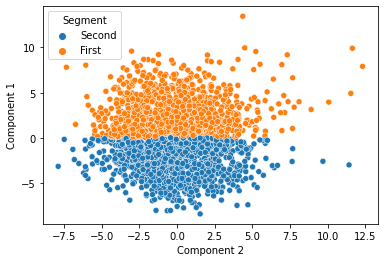

In [52]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment']);

Summarize your results and make a conclusion.


ALS or amyotrophic lateral sclerosis is a neurodegenerative disease that can happen to anyone at any time. It is difficult to predict both cause and prognosis. For this analysis, we looked at a dataset containing patient medical data for over 2400 patients.

To begin with, I removed any variables that were not medically necessary (ID and subjectID) and confirmed that none of the fields were missing data or containing NaNs). Then I used a standard to scale the data. I calculated a silhouette score for various cluster sizes and found a max silhouette score for 2 clusters, indicating that this was the correct number of clusters to use for my K-Means algorithm. I then preformed a PCA with 2 features and fit it to the data. I then combined my PCA with a K-Means clustering algorithm and can see a clear separation of a cluster into two parts.